### <u> Author :  Mohamed Shafeek T <u>
### <u>Project Title<u>: Data Analysis on Tamil Nadu Road Accidents (2020 & 2021)</center>

**Comprehensive Overview:**<br>
The "Data Analysis on Tamil Nadu Road Accidents" is a project deals with analysis of data on Road Accidents encountered by Tamil Nadu state in the year of 2020 and 2021. But the dataset is most recently created (created on February 15, 2023 with source form TN Police). The reason why i have chosen especial Tamil Nadu is that it is the state that has been accounted for the **Highest number of road accidents in India** that takes place on National high-ways and express-ways. This project is more like an **End-to-End Data Analytics project** which integrates a collection of **skills and tools** such as : 
    
**NumPy and Pandas** for Data Cleaning. It could have been better to perform Initial Data Cleaning / Data Pre-processing more faster if i used Spreadsheet. But the only reason why i used Python libraries for Data Cleaning / Data pre-processing is that i can clearly demonstrate each and every step of data cleaning using it. For an instance, how the data has been converted from it's original format into the correct format (if the original data is wrong).
    
**Geophy** for Feature Engineering (created a new field using information from already existing fields, which can have scopes of usage in future.)

**Matplotlib, Seaborn and Folium** for general Exploratory Data Analysis (EDA) and for some basic Data Visualizations within the Jupyter Notebook.
    
**Tableau** for Visualizations of Key Findings / Insights and for creating the final Dashboard.
    
**NOTE :** This Notebook includes only Data Cleaning, Data Transformation (creating a new DataFrame using records from scopeful rows), Feature Engineering, few EDA and some visualizations.
    
**Project Details:**
- **Data Source:** The project extracts data from the website called "Open City".<br>
    Data Source URL : (https://data.opencity.in/dataset/tamil-nadu-crime-data/resource/tamil-nadu-district-and-citywise-road-accident-deaths-in-2019-to-2021)

- **Code Structure:** The Jupyter Notebook is structured into well-organized code cells, each serving a specific purpose. The code is documented with comments, explaining the functionality of each cell and the overall logic of the Data Cleaning and further processes.

- **Updated DataSet:** As the original dataset can not also be clean enough in order take that dataset into Data Analysis phase, i have cleaned the dataset and stored the cleaned dataset as an "updated_dataset" in ".csv" file extension.

- **Export to Spreadsheet:** The project includes functionality to export the extracted DataFrame to a spreadsheet. Users have the option to save the data in CSV or Excel format, enabling further analysis and visualization using various data analysis tools.

- **Documentation:** Detailed Markdown cells provide comprehensive documentation for the entire web scraping process. Explanations of the project's objectives, web scraping methodology, code explanations, and data output are included.

- **Sample Output:** The Jupyter Notebook presents a preview of the DataFrame, displaying cleaned and transformed data. 

- **Limitations:** The project acknowledges potential limitations, such as possible changes in the website's structure that may impact the result of the analysis.

- **Future Plans:** Even though the Data is a Real-time data, no real-time audience or no real-time clients are involved to showcase and present my Dashboard as this is an educational purpose project. I consider every user going through my project is my client / audience.  

**Conclusion:**

The "Data Analysis on Tamil Nadu Road Accidents (2020 & 2021)" project demonstrates the power of data cleaning, data transformation, feature engineering, exploratory analysis and data visualization to gather valuable data for further analysis. It provides users with a valuable Aesthetic Dashboard to view the Graphical Representation of Road Accidents in Tamil Nadu in the year 2020 & 2021.

#### Let's get into the project real quick.

### Importing all crucial libraries

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [14]:
df = pd.read_csv('tn_road_accident_dataset_original.csv')

In [15]:
df.head()

,_id,S.No.,District,2020- Fatal,2021- Fatal,2020- Non-fatal,2021- Non-fatal,Total - 2020,Total - 2021,Death by Lorries - 2021,Death by Buses-2021,Death by Cars/Jeeps 2021,Death by Three-wheelers - 2021,Death by Two-wheelers 2021,Death by Others 2021,Total Deaths 2021
0,1,1.0,Chennai City,885,975,3502,4059,4387,5034.0,156,69,181,35,464,93,998
1,2,2.0,Coimbatore City,187,232,520,634,707,866.0,34,19,48,9,103,21,234
2,3,3.0,Madurai City,158,152,372,466,530,618.0,12,16,29,8,65,24,154
3,4,4.0,Salem City,151,147,473,537,624,684.0,28,13,35,1,59,13,149
4,5,5.0,Thiruchirapalli City,127,126,271,273,398,399.0,13,17,30,3,43,24,130


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   _id                             46 non-null     int64  
 1   S.No.                           45 non-null     float64
 2   District                        46 non-null     object 
 3   2020- Fatal                     46 non-null     int64  
 4   2021- Fatal                     46 non-null     int64  
 5   2020- Non-fatal                 46 non-null     int64  
 6   2021- Non-fatal                 46 non-null     int64  
 7   Total - 2020                    46 non-null     int64  
 8   Total - 2021                    45 non-null     float64
 9   Death by Lorries - 2021         46 non-null     int64  
 10  Death by Buses-2021             46 non-null     int64  
 11  Death by Cars/Jeeps 2021        46 non-null     int64  
 12  Death by Three-wheelers - 2021  46 non

In [17]:
df.columns

Index(['_id', 'S.No.', 'District', '2020- Fatal', '2021- Fatal',
       '2020- Non-fatal', '2021- Non-fatal', 'Total - 2020', 'Total - 2021',
       'Death by Lorries - 2021', 'Death by Buses-2021',
       'Death by Cars/Jeeps 2021', 'Death by Three-wheelers - 2021',
       'Death by Two-wheelers 2021', 'Death by Others 2021',
       'Total Deaths 2021'],
      dtype='object')

### 1 - Let's get started with Data Cleaning

### As we can see that the Column name is little messy we have to clean our Column names / headers.

In [18]:
# Let's do it using our Custom function
def clean_headers(val):
    if isinstance(val,str):
        val = "".join(char for char in val if char.isalnum() or char in (" ","_"))
        val = val.strip().lower().replace(" ","_")
        return val
    else:
        return val

In [19]:
df = df.rename(columns=clean_headers)
df

,_id,sno,district,2020_fatal,2021_fatal,2020_nonfatal,2021_nonfatal,total__2020,total__2021,death_by_lorries__2021,death_by_buses2021,death_by_carsjeeps_2021,death_by_threewheelers__2021,death_by_twowheelers_2021,death_by_others_2021,total_deaths_2021
0,1,1.0,Chennai City,885,975,3502,4059,4387,5034.0,156,69,181,35,464,93,998
1,2,2.0,Coimbatore City,187,232,520,634,707,866.0,34,19,48,9,103,21,234
2,3,3.0,Madurai City,158,152,372,466,530,618.0,12,16,29,8,65,24,154
3,4,4.0,Salem City,151,147,473,537,624,684.0,28,13,35,1,59,13,149
4,5,5.0,Thiruchirapalli City,127,126,271,273,398,399.0,13,17,30,3,43,24,130
5,6,6.0,Thirunelveli City,72,76,208,317,280,393.0,7,11,20,6,31,5,80
6,7,7.0,Thirupur City,124,144,500,498,624,642.0,25,9,32,4,77,0,147
7,8,8.0,Ariyalur,146,161,325,384,471,545.0,30,10,43,2,73,16,174
8,9,9.0,Chengalpattu,426,452,922,1162,1348,1614.0,74,44,94,6,148,106,472
9,10,10.0,Coimbatore,655,593,1303,1333,1958,1926.0,87,29,154,9,279,49,607


In [20]:
df.columns

Index(['_id', 'sno', 'district', '2020_fatal', '2021_fatal', '2020_nonfatal',
       '2021_nonfatal', 'total__2020', 'total__2021', 'death_by_lorries__2021',
       'death_by_buses2021', 'death_by_carsjeeps_2021',
       'death_by_threewheelers__2021', 'death_by_twowheelers_2021',
       'death_by_others_2021', 'total_deaths_2021'],
      dtype='object')

### Dealing with Null values

In [21]:
df.fillna(value=0,inplace=True)
df

,_id,sno,district,2020_fatal,2021_fatal,2020_nonfatal,2021_nonfatal,total__2020,total__2021,death_by_lorries__2021,death_by_buses2021,death_by_carsjeeps_2021,death_by_threewheelers__2021,death_by_twowheelers_2021,death_by_others_2021,total_deaths_2021
0,1,1.0,Chennai City,885,975,3502,4059,4387,5034.0,156,69,181,35,464,93,998
1,2,2.0,Coimbatore City,187,232,520,634,707,866.0,34,19,48,9,103,21,234
2,3,3.0,Madurai City,158,152,372,466,530,618.0,12,16,29,8,65,24,154
3,4,4.0,Salem City,151,147,473,537,624,684.0,28,13,35,1,59,13,149
4,5,5.0,Thiruchirapalli City,127,126,271,273,398,399.0,13,17,30,3,43,24,130
5,6,6.0,Thirunelveli City,72,76,208,317,280,393.0,7,11,20,6,31,5,80
6,7,7.0,Thirupur City,124,144,500,498,624,642.0,25,9,32,4,77,0,147
7,8,8.0,Ariyalur,146,161,325,384,471,545.0,30,10,43,2,73,16,174
8,9,9.0,Chengalpattu,426,452,922,1162,1348,1614.0,74,44,94,6,148,106,472
9,10,10.0,Coimbatore,655,593,1303,1333,1958,1926.0,87,29,154,9,279,49,607


In [22]:
df['sno'] #I found out that sno of id 46 was NaN and now replaced with 0.0. But we have to replace it with the correct value

0      1.0
1      2.0
2      3.0
3      4.0
4      5.0
5      6.0
6      7.0
7      8.0
8      9.0
9     10.0
10    11.0
11    12.0
12    13.0
13    14.0
14    15.0
15    16.0
16    17.0
17    18.0
18    19.0
19    20.0
20    21.0
21    22.0
22    23.0
23    24.0
24    25.0
25    26.0
26    27.0
27    28.0
28    29.0
29    30.0
30    31.0
31    32.0
32    33.0
33    34.0
34    35.0
35    36.0
36    37.0
37    38.0
38    39.0
39    40.0
40    41.0
41    42.0
42    43.0
43    44.0
44    45.0
45     0.0
Name: sno, dtype: float64

In [23]:
df.loc[df['sno'] == 0.0, 'sno'] = 46.0
df

,_id,sno,district,2020_fatal,2021_fatal,2020_nonfatal,2021_nonfatal,total__2020,total__2021,death_by_lorries__2021,death_by_buses2021,death_by_carsjeeps_2021,death_by_threewheelers__2021,death_by_twowheelers_2021,death_by_others_2021,total_deaths_2021
0,1,1.0,Chennai City,885,975,3502,4059,4387,5034.0,156,69,181,35,464,93,998
1,2,2.0,Coimbatore City,187,232,520,634,707,866.0,34,19,48,9,103,21,234
2,3,3.0,Madurai City,158,152,372,466,530,618.0,12,16,29,8,65,24,154
3,4,4.0,Salem City,151,147,473,537,624,684.0,28,13,35,1,59,13,149
4,5,5.0,Thiruchirapalli City,127,126,271,273,398,399.0,13,17,30,3,43,24,130
5,6,6.0,Thirunelveli City,72,76,208,317,280,393.0,7,11,20,6,31,5,80
6,7,7.0,Thirupur City,124,144,500,498,624,642.0,25,9,32,4,77,0,147
7,8,8.0,Ariyalur,146,161,325,384,471,545.0,30,10,43,2,73,16,174
8,9,9.0,Chengalpattu,426,452,922,1162,1348,1614.0,74,44,94,6,148,106,472
9,10,10.0,Coimbatore,655,593,1303,1333,1958,1926.0,87,29,154,9,279,49,607


### Changing the datatype of of the Column 'total__2021' from float to int.

In [24]:
df['total__2021']=df['total__2021'].astype('int')
df

,_id,sno,district,2020_fatal,2021_fatal,2020_nonfatal,2021_nonfatal,total__2020,total__2021,death_by_lorries__2021,death_by_buses2021,death_by_carsjeeps_2021,death_by_threewheelers__2021,death_by_twowheelers_2021,death_by_others_2021,total_deaths_2021
0,1,1.0,Chennai City,885,975,3502,4059,4387,5034,156,69,181,35,464,93,998
1,2,2.0,Coimbatore City,187,232,520,634,707,866,34,19,48,9,103,21,234
2,3,3.0,Madurai City,158,152,372,466,530,618,12,16,29,8,65,24,154
3,4,4.0,Salem City,151,147,473,537,624,684,28,13,35,1,59,13,149
4,5,5.0,Thiruchirapalli City,127,126,271,273,398,399,13,17,30,3,43,24,130
5,6,6.0,Thirunelveli City,72,76,208,317,280,393,7,11,20,6,31,5,80
6,7,7.0,Thirupur City,124,144,500,498,624,642,25,9,32,4,77,0,147
7,8,8.0,Ariyalur,146,161,325,384,471,545,30,10,43,2,73,16,174
8,9,9.0,Chengalpattu,426,452,922,1162,1348,1614,74,44,94,6,148,106,472
9,10,10.0,Coimbatore,655,593,1303,1333,1958,1926,87,29,154,9,279,49,607


### The last entire row and the last entire column seems suspicious. The last row holds a whole different information (total_info). So it can be removed and created as a new DataFrame. But In My Knowledge, the last column (deaths_2021) doesn't make any sense when compared with anyother values in original DataFrame. i.e : The total of 'total_deaths_2021' must be equal to total of 'fatal_2021' because the dataset is talking about only the deaths occured by accidents.

In [25]:
#let's drop the last column
df_dropped= df.drop('total_deaths_2021', axis=1) 
df_dropped

,_id,sno,district,2020_fatal,2021_fatal,2020_nonfatal,2021_nonfatal,total__2020,total__2021,death_by_lorries__2021,death_by_buses2021,death_by_carsjeeps_2021,death_by_threewheelers__2021,death_by_twowheelers_2021,death_by_others_2021
0,1,1.0,Chennai City,885,975,3502,4059,4387,5034,156,69,181,35,464,93
1,2,2.0,Coimbatore City,187,232,520,634,707,866,34,19,48,9,103,21
2,3,3.0,Madurai City,158,152,372,466,530,618,12,16,29,8,65,24
3,4,4.0,Salem City,151,147,473,537,624,684,28,13,35,1,59,13
4,5,5.0,Thiruchirapalli City,127,126,271,273,398,399,13,17,30,3,43,24
5,6,6.0,Thirunelveli City,72,76,208,317,280,393,7,11,20,6,31,5
6,7,7.0,Thirupur City,124,144,500,498,624,642,25,9,32,4,77,0
7,8,8.0,Ariyalur,146,161,325,384,471,545,30,10,43,2,73,16
8,9,9.0,Chengalpattu,426,452,922,1162,1348,1614,74,44,94,6,148,106
9,10,10.0,Coimbatore,655,593,1303,1333,1958,1926,87,29,154,9,279,49


In [26]:
# The below city names have to be corrected to their name with correct spelling
df_dropped.at[4, 'district'] = 'Tiruchirappalli City'
df_dropped.at[5, 'district'] = 'Tirunelveli  City'
df_dropped.at[6, 'district'] = 'Tirupur City'

df_dropped.at[28, 'district'] = 'Tenkasi'
df_dropped.at[32, 'district'] = 'Tiruvallur'
df_dropped.at[35, 'district'] = 'Tiruchirappalli'
df_dropped.at[36, 'district'] = 'Tirunelveli'
df_dropped.at[37, 'district'] = 'Thirupathur'
df_dropped.at[38, 'district'] = 'Tirupur'
df_dropped.at[39, 'district'] = 'Thiruvannamalai'

### 2 - Data Transformation

In [27]:
#Before dropping the last row, let's create a new dataframe using it.

data = {'year':[2020,2020,2021,2021],
       'type_of_accident':['fatal','nonfatal','fatal','nonfatal'],
       'total_accident':[13868,35976,14747,40935],
       'total_accident_by_year':[49844,49844,55682,55682]}

data1 = {
    'transportation' : ['lorry','bus','car/jeep','threewheeler','twowheeler','others'],
    'total_deaths' : [2192,991,3728,307,6493,1673]
}

In [28]:
new_df = pd.DataFrame(data)
new_df

,year,type_of_accident,total_accident,total_accident_by_year
0,2020,fatal,13868,49844
1,2020,nonfatal,35976,49844
2,2021,fatal,14747,55682
3,2021,nonfatal,40935,55682


In [29]:
new_df1 = pd.DataFrame(data1)
new_df1

,transportation,total_deaths
0,lorry,2192
1,bus,991
2,car/jeep,3728
3,threewheeler,307
4,twowheeler,6493
5,others,1673


In [30]:
df_dropped.drop(44,axis=0,inplace=True) #The rows with irrevelant information are 43 and 44.
df_dropped.drop(45,axis=0,inplace=True) #Also we have created a separated DataFrame from the 45th row. So we can remove that too.

In [31]:
df_dropped.drop(43,axis=0,inplace=True)
df_dropped

,_id,sno,district,2020_fatal,2021_fatal,2020_nonfatal,2021_nonfatal,total__2020,total__2021,death_by_lorries__2021,death_by_buses2021,death_by_carsjeeps_2021,death_by_threewheelers__2021,death_by_twowheelers_2021,death_by_others_2021
0,1,1.0,Chennai City,885,975,3502,4059,4387,5034,156,69,181,35,464,93
1,2,2.0,Coimbatore City,187,232,520,634,707,866,34,19,48,9,103,21
2,3,3.0,Madurai City,158,152,372,466,530,618,12,16,29,8,65,24
3,4,4.0,Salem City,151,147,473,537,624,684,28,13,35,1,59,13
4,5,5.0,Tiruchirappalli City,127,126,271,273,398,399,13,17,30,3,43,24
5,6,6.0,Tirunelveli City,72,76,208,317,280,393,7,11,20,6,31,5
6,7,7.0,Tirupur City,124,144,500,498,624,642,25,9,32,4,77,0
7,8,8.0,Ariyalur,146,161,325,384,471,545,30,10,43,2,73,16
8,9,9.0,Chengalpattu,426,452,922,1162,1348,1614,74,44,94,6,148,106
9,10,10.0,Coimbatore,655,593,1303,1333,1958,1926,87,29,154,9,279,49


In [32]:
df

,_id,sno,district,2020_fatal,2021_fatal,2020_nonfatal,2021_nonfatal,total__2020,total__2021,death_by_lorries__2021,death_by_buses2021,death_by_carsjeeps_2021,death_by_threewheelers__2021,death_by_twowheelers_2021,death_by_others_2021,total_deaths_2021
0,1,1.0,Chennai City,885,975,3502,4059,4387,5034,156,69,181,35,464,93,998
1,2,2.0,Coimbatore City,187,232,520,634,707,866,34,19,48,9,103,21,234
2,3,3.0,Madurai City,158,152,372,466,530,618,12,16,29,8,65,24,154
3,4,4.0,Salem City,151,147,473,537,624,684,28,13,35,1,59,13,149
4,5,5.0,Thiruchirapalli City,127,126,271,273,398,399,13,17,30,3,43,24,130
5,6,6.0,Thirunelveli City,72,76,208,317,280,393,7,11,20,6,31,5,80
6,7,7.0,Thirupur City,124,144,500,498,624,642,25,9,32,4,77,0,147
7,8,8.0,Ariyalur,146,161,325,384,471,545,30,10,43,2,73,16,174
8,9,9.0,Chengalpattu,426,452,922,1162,1348,1614,74,44,94,6,148,106,472
9,10,10.0,Coimbatore,655,593,1303,1333,1958,1926,87,29,154,9,279,49,607


In [33]:
df_dropped

,_id,sno,district,2020_fatal,2021_fatal,2020_nonfatal,2021_nonfatal,total__2020,total__2021,death_by_lorries__2021,death_by_buses2021,death_by_carsjeeps_2021,death_by_threewheelers__2021,death_by_twowheelers_2021,death_by_others_2021
0,1,1.0,Chennai City,885,975,3502,4059,4387,5034,156,69,181,35,464,93
1,2,2.0,Coimbatore City,187,232,520,634,707,866,34,19,48,9,103,21
2,3,3.0,Madurai City,158,152,372,466,530,618,12,16,29,8,65,24
3,4,4.0,Salem City,151,147,473,537,624,684,28,13,35,1,59,13
4,5,5.0,Tiruchirappalli City,127,126,271,273,398,399,13,17,30,3,43,24
5,6,6.0,Tirunelveli City,72,76,208,317,280,393,7,11,20,6,31,5
6,7,7.0,Tirupur City,124,144,500,498,624,642,25,9,32,4,77,0
7,8,8.0,Ariyalur,146,161,325,384,471,545,30,10,43,2,73,16
8,9,9.0,Chengalpattu,426,452,922,1162,1348,1614,74,44,94,6,148,106
9,10,10.0,Coimbatore,655,593,1303,1333,1958,1926,87,29,154,9,279,49


In [34]:
df_dropped

,_id,sno,district,2020_fatal,2021_fatal,2020_nonfatal,2021_nonfatal,total__2020,total__2021,death_by_lorries__2021,death_by_buses2021,death_by_carsjeeps_2021,death_by_threewheelers__2021,death_by_twowheelers_2021,death_by_others_2021
0,1,1.0,Chennai City,885,975,3502,4059,4387,5034,156,69,181,35,464,93
1,2,2.0,Coimbatore City,187,232,520,634,707,866,34,19,48,9,103,21
2,3,3.0,Madurai City,158,152,372,466,530,618,12,16,29,8,65,24
3,4,4.0,Salem City,151,147,473,537,624,684,28,13,35,1,59,13
4,5,5.0,Tiruchirappalli City,127,126,271,273,398,399,13,17,30,3,43,24
5,6,6.0,Tirunelveli City,72,76,208,317,280,393,7,11,20,6,31,5
6,7,7.0,Tirupur City,124,144,500,498,624,642,25,9,32,4,77,0
7,8,8.0,Ariyalur,146,161,325,384,471,545,30,10,43,2,73,16
8,9,9.0,Chengalpattu,426,452,922,1162,1348,1614,74,44,94,6,148,106
9,10,10.0,Coimbatore,655,593,1303,1333,1958,1926,87,29,154,9,279,49


### 3 - Feature Engineering

In [36]:
df_dropped['total_accidents'] = df_dropped['total__2020'] + df_dropped['total__2021']
sorted_data = df_dropped.sort_values(by='total_accidents', ascending=False)
df_dropped

,_id,sno,district,2020_fatal,2021_fatal,2020_nonfatal,2021_nonfatal,total__2020,total__2021,death_by_lorries__2021,death_by_buses2021,death_by_carsjeeps_2021,death_by_threewheelers__2021,death_by_twowheelers_2021,death_by_others_2021,total_accidents
0,1,1.0,Chennai City,885,975,3502,4059,4387,5034,156,69,181,35,464,93,9421
1,2,2.0,Coimbatore City,187,232,520,634,707,866,34,19,48,9,103,21,1573
2,3,3.0,Madurai City,158,152,372,466,530,618,12,16,29,8,65,24,1148
3,4,4.0,Salem City,151,147,473,537,624,684,28,13,35,1,59,13,1308
4,5,5.0,Tiruchirappalli City,127,126,271,273,398,399,13,17,30,3,43,24,797
5,6,6.0,Tirunelveli City,72,76,208,317,280,393,7,11,20,6,31,5,673
6,7,7.0,Tirupur City,124,144,500,498,624,642,25,9,32,4,77,0,1266
7,8,8.0,Ariyalur,146,161,325,384,471,545,30,10,43,2,73,16,1016
8,9,9.0,Chengalpattu,426,452,922,1162,1348,1614,74,44,94,6,148,106,2962
9,10,10.0,Coimbatore,655,593,1303,1333,1958,1926,87,29,154,9,279,49,3884


In [37]:
sorted_data

,_id,sno,district,2020_fatal,2021_fatal,2020_nonfatal,2021_nonfatal,total__2020,total__2021,death_by_lorries__2021,death_by_buses2021,death_by_carsjeeps_2021,death_by_threewheelers__2021,death_by_twowheelers_2021,death_by_others_2021,total_accidents
0,1,1.0,Chennai City,885,975,3502,4059,4387,5034,156,69,181,35,464,93,9421
10,11,11.0,Cuddalore,488,525,2145,2402,2633,2927,89,39,135,6,221,60,5560
41,42,42.0,Villupuram,507,503,1430,1628,1937,2131,70,39,131,9,209,62,4068
38,39,39.0,Tirupur,619,624,1357,1437,1976,2061,88,31,199,6,280,47,4037
9,10,10.0,Coimbatore,655,593,1303,1333,1958,1926,87,29,154,9,279,49,3884
26,27,27.0,Salem,514,559,1249,1363,1763,1922,104,20,167,1,242,38,3685
13,14,14.0,Erode,537,494,1268,1358,1805,1852,67,20,160,1,236,41,3657
29,30,30.0,Thanjavur,445,416,1261,1433,1706,1849,34,37,88,4,222,46,3555
18,19,19.0,Krishnagiri,543,543,1051,1191,1594,1734,137,31,123,8,184,106,3328
12,13,13.0,Dindigul,455,509,1068,1238,1523,1747,85,48,183,8,152,63,3270


### 'geopy' library for finding geographical Coordinates of the corresponding cities

In [38]:
from geopy.geocoders import Nominatim

In [39]:
geolocator = Nominatim(user_agent="my_geocoder")

In [40]:
city_names = df_dropped['district']

latitudes = []
longitudes = []

for city_name in city_names:
    location = geolocator.geocode(city_name)
    if location:
        latitudes.append(location.latitude)
        longitudes.append(location.longitude)
    else:
        latitudes.append(None)
        longitudes.append(None)


In [41]:
df_dropped['latitude'] = latitudes
df_dropped['longitude'] = longitudes

In [42]:
df_dropped

,_id,sno,district,2020_fatal,2021_fatal,2020_nonfatal,2021_nonfatal,total__2020,total__2021,death_by_lorries__2021,death_by_buses2021,death_by_carsjeeps_2021,death_by_threewheelers__2021,death_by_twowheelers_2021,death_by_others_2021,total_accidents,latitude,longitude
0,1,1.0,Chennai City,885,975,3502,4059,4387,5034,156,69,181,35,464,93,9421,13.083694,80.270186
1,2,2.0,Coimbatore City,187,232,520,634,707,866,34,19,48,9,103,21,1573,11.001812,76.962842
2,3,3.0,Madurai City,158,152,372,466,530,618,12,16,29,8,65,24,1148,9.926115,78.114098
3,4,4.0,Salem City,151,147,473,537,624,684,28,13,35,1,59,13,1308,44.939157,-123.033121
4,5,5.0,Tiruchirappalli City,127,126,271,273,398,399,13,17,30,3,43,24,797,10.804973,78.687030
5,6,6.0,Tirunelveli City,72,76,208,317,280,393,7,11,20,6,31,5,673,8.728427,77.711292
6,7,7.0,Tirupur City,124,144,500,498,624,642,25,9,32,4,77,0,1266,11.101781,77.345192
7,8,8.0,Ariyalur,146,161,325,384,471,545,30,10,43,2,73,16,1016,11.076036,79.117455
8,9,9.0,Chengalpattu,426,452,922,1162,1348,1614,74,44,94,6,148,106,2962,12.684089,79.983637
9,10,10.0,Coimbatore,655,593,1303,1333,1958,1926,87,29,154,9,279,49,3884,11.001812,76.962842


### Exporting the updated DataFrames

In [43]:
df_dropped.to_csv(r'C:\Users\ADMIN\Desktop\TN Road Accident Analysis\updated_dataset.csv', index=False)

In [44]:
new_df.to_csv(r'C:\Users\ADMIN\Desktop\TN Road Accident Analysis\total_accident_data.csv', index=False)

In [45]:
new_df1.to_csv(r'C:\Users\ADMIN\Desktop\TN Road Accident Analysis\transportation_data.csv', index=False)

### So far i have done Data Cleaning and Feature Engineering (Added 2 columns (latitude & longitude) using city names from an original column and also created the column 'total_accidents' by adding 'total__2020' and 'total__2021' columns)

In [46]:
df_dropped.columns

Index(['_id', 'sno', 'district', '2020_fatal', '2021_fatal', '2020_nonfatal',
       '2021_nonfatal', 'total__2020', 'total__2021', 'death_by_lorries__2021',
       'death_by_buses2021', 'death_by_carsjeeps_2021',
       'death_by_threewheelers__2021', 'death_by_twowheelers_2021',
       'death_by_others_2021', 'total_accidents', 'latitude', 'longitude'],
      dtype='object')

### 4 - Few Visualization (Including an Interactive Geographical Map)

#### Folium for Geographical Representation of Data

In [47]:
import folium 

In [48]:
# Create a map centered at a specific location
map_center = [11.567673580523001, 78.74224293596028]  # You can set this to the center of your cities' latitudes and longitudes
my_map = folium.Map(location=map_center, zoom_start=6)  # Adjust zoom level as needed


In [49]:
my_map

In [50]:
for index, row in df_dropped.iterrows():
    # Determine color based on the number of accidents
    color = 'red' if row['total_accidents'] > df_dropped['total_accidents'].mean() else 'green'
    
    # Create a marker for each city
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=10,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.6,
        popup=f"{row['district']}<br>Accidents: {row['total_accidents']}"
    ).add_to(my_map)
    
my_map

### In the above Geographical Representation, the Green Circles depict the cities with Less number of accidents and the Red Circles depict the cities with High number of accidents.

### The below three DataFrames are the Cleaned and Transformed DataFrames : 
#### df_dropped, new_df and new_df1

In [51]:
df_dropped.head()

,_id,sno,district,2020_fatal,2021_fatal,2020_nonfatal,2021_nonfatal,total__2020,total__2021,death_by_lorries__2021,death_by_buses2021,death_by_carsjeeps_2021,death_by_threewheelers__2021,death_by_twowheelers_2021,death_by_others_2021,total_accidents,latitude,longitude
0,1,1.0,Chennai City,885,975,3502,4059,4387,5034,156,69,181,35,464,93,9421,13.083694,80.270186
1,2,2.0,Coimbatore City,187,232,520,634,707,866,34,19,48,9,103,21,1573,11.001812,76.962842
2,3,3.0,Madurai City,158,152,372,466,530,618,12,16,29,8,65,24,1148,9.926115,78.114098
3,4,4.0,Salem City,151,147,473,537,624,684,28,13,35,1,59,13,1308,44.939157,-123.033121
4,5,5.0,Tiruchirappalli City,127,126,271,273,398,399,13,17,30,3,43,24,797,10.804973,78.687030


In [52]:
new_df

,year,type_of_accident,total_accident,total_accident_by_year
0,2020,fatal,13868,49844
1,2020,nonfatal,35976,49844
2,2021,fatal,14747,55682
3,2021,nonfatal,40935,55682


In [53]:
new_df1

,transportation,total_deaths
0,lorry,2192
1,bus,991
2,car/jeep,3728
3,threewheeler,307
4,twowheeler,6493
5,others,1673


### 5 - Two crucial visualizations using seaborn library

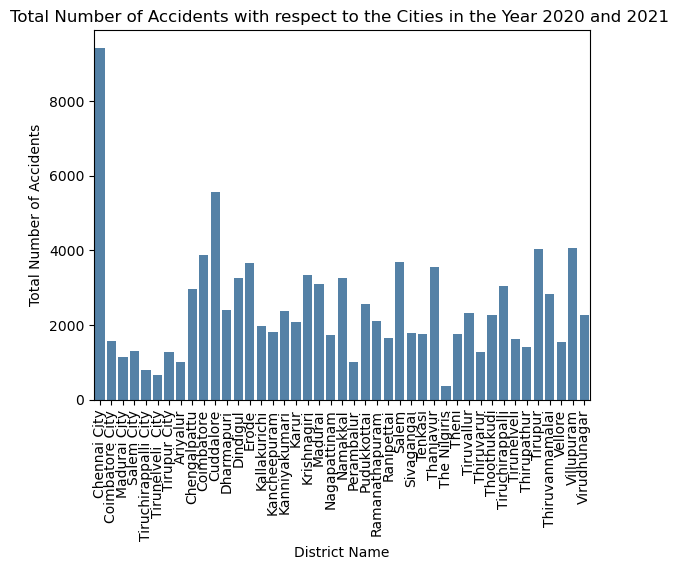

In [54]:
sns.barplot(x='district', y='total_accidents', data=df_dropped,color='steelblue')
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.xlabel('District Name')
plt.ylabel('Total Number of Accidents')
plt.title('Total Number of Accidents with respect to the Cities in the Year 2020 and 2021 ')
plt.show()

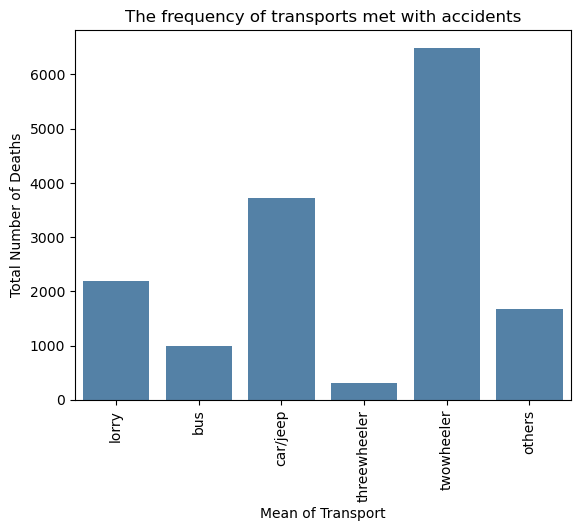

In [55]:
sns.barplot(x='transportation', y='total_deaths', data=new_df1,color='steelblue')
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.xlabel('Mean of Transport')
plt.ylabel('Total Number of Deaths')
plt.title('The frequency of transports met with accidents')
plt.show()

### Well, our job with Jupyter notebook is all done right here. For the final outcome of the project, look at the Dashboard that i have published in my Tableau Public Profile.

### URL to the Dashboard :
https://public.tableau.com/app/profile/mohamed.shafeek.t/viz/RoadAccidentsinTamilNadu20202021/Dashboard1